In [2]:
import synapseclient as sc
import pandas as pd
import sys
import warnings
sys.path.append("../../src")

import utils.munging_utils as query
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")
sns.set_style("dark")
%matplotlib inline

Welcome, aryton tediarjo!



In [4]:
data = query.get_file_entity("syn21281633")

In [77]:
## helper functions ## 
def ageGroups(params):
    if params <= 30:
        return "<30"
    elif (params > 30) & (params <= 40):
        return "30-40"
    elif (params > 40) & (params <= 50):
        return "40-50"
    elif (params > 50) & (params <= 60):
        return "50-60"
    else:
        return ">60"


def visualize_agegroups(data, features):
    
    data["ageGroups"] = data["age"].apply(ageGroups)
    
    male = data[data["gender"] == "male"]
    female = data[data["gender"] == "female"]

    fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize= (15, 30))
    
    sns.distplot(male[features][(male["ageGroups"] == "<30")], kde_kws={"shade": True},
                     hist = False, ax = axes[0,0], color = "yellow")
    axes[0,0].grid()
    axes[0,0].set_title("Male 20-30 Years Old")

    sns.distplot(male[features][(male["ageGroups"] == "30-40")], kde_kws={"shade": True}, hist = False,
                     ax = axes[1,0], color = "orange")
    axes[1,0].grid()
    axes[1,0].set_title("Male 30-40 Years Old")

    sns.distplot(male[features][(male["ageGroups"] == "40-50")], kde_kws={"shade": True}, hist = False,
                     ax = axes[2,0], color = "purple")
    axes[2,0].grid()
    axes[2,0].set_title("Male 40-50 Years Old")


    sns.distplot(male[features][(male["ageGroups"] == "50-60")], kde_kws={"shade": True}, hist = False,
                     ax = axes[3,0], color = "blue")
    axes[3,0].grid()
    axes[3,0].set_title("Male 50-60 Years Old")
    
    
    sns.distplot(male[features][(male["ageGroups"] == ">60")], kde_kws={"shade": True}, hist = False,
                     ax = axes[4,0], color = "red")
    axes[4,0].grid()
    axes[4,0].set_title("Male >60 Years Old")
    
    for ageGroup, color in zip(male["ageGroups"].unique(), ["yellow", "orange", "purple", "blue", "red"]):
        sns.distplot(male[features][(male["ageGroups"] == ageGroup)], 
                     kde_kws={"shade": True}, hist = False, label = ageGroup,
                    ax = axes[5,0], color = color)
        axes[5,0].grid()
        axes[5,0].set_title("Male All AgeGroup Distribution")
        axes[5,0].legend()
        
    sns.distplot(female[features][(female["ageGroups"] == "<30")], kde_kws={"shade": True},
                     hist = False, ax = axes[0,1], color = "yellow")
    axes[0,1].grid()
    axes[0,1].set_title("Female 20-30 Years Old")

    sns.distplot(female[features][(female["ageGroups"] == "30-40")], kde_kws={"shade": True}, hist = False,
                     ax = axes[1,1], color = "orange")
    axes[1,1].grid()
    axes[1,1].set_title("Female 30-40 Years Old")

    sns.distplot(female[features][(female["ageGroups"] == "40-50")], kde_kws={"shade": True}, hist = False,
                     ax = axes[2,1], color = "purple")
    axes[2,1].grid()
    axes[2,1].set_title("Female 40-50 Years Old")


    sns.distplot(female[features][(female["ageGroups"] == "50-60")], kde_kws={"shade": True}, hist = False,
                     ax = axes[3,1], color = "blue")
    axes[3,1].grid()
    axes[3,1].set_title("Female 50-60 Years Old")
    
    
    sns.distplot(female[features][(female["ageGroups"] == ">60")], kde_kws={"shade": True}, hist = False,
                     ax = axes[4,1], color = "red")
    axes[4,1].grid()
    axes[4,1].set_title("Female >60 Years Old")
    
    for ageGroup, color in zip(female["ageGroups"].unique(), ["yellow", "orange", "purple", "blue", "red"]):
        sns.distplot(female[features][(female["ageGroups"] == ageGroup)], 
                     kde_kws={"shade": True}, hist = False, label = ageGroup,
                    ax = axes[5,1], color = color)
        axes[5,1].grid()
        axes[5,1].set_title("Female All AgeGroup Distribution")
        axes[5,1].legend()

    plt.tight_layout()
    plt.show()

# 1.) Distribution of Features in Controls Accross Age Bins

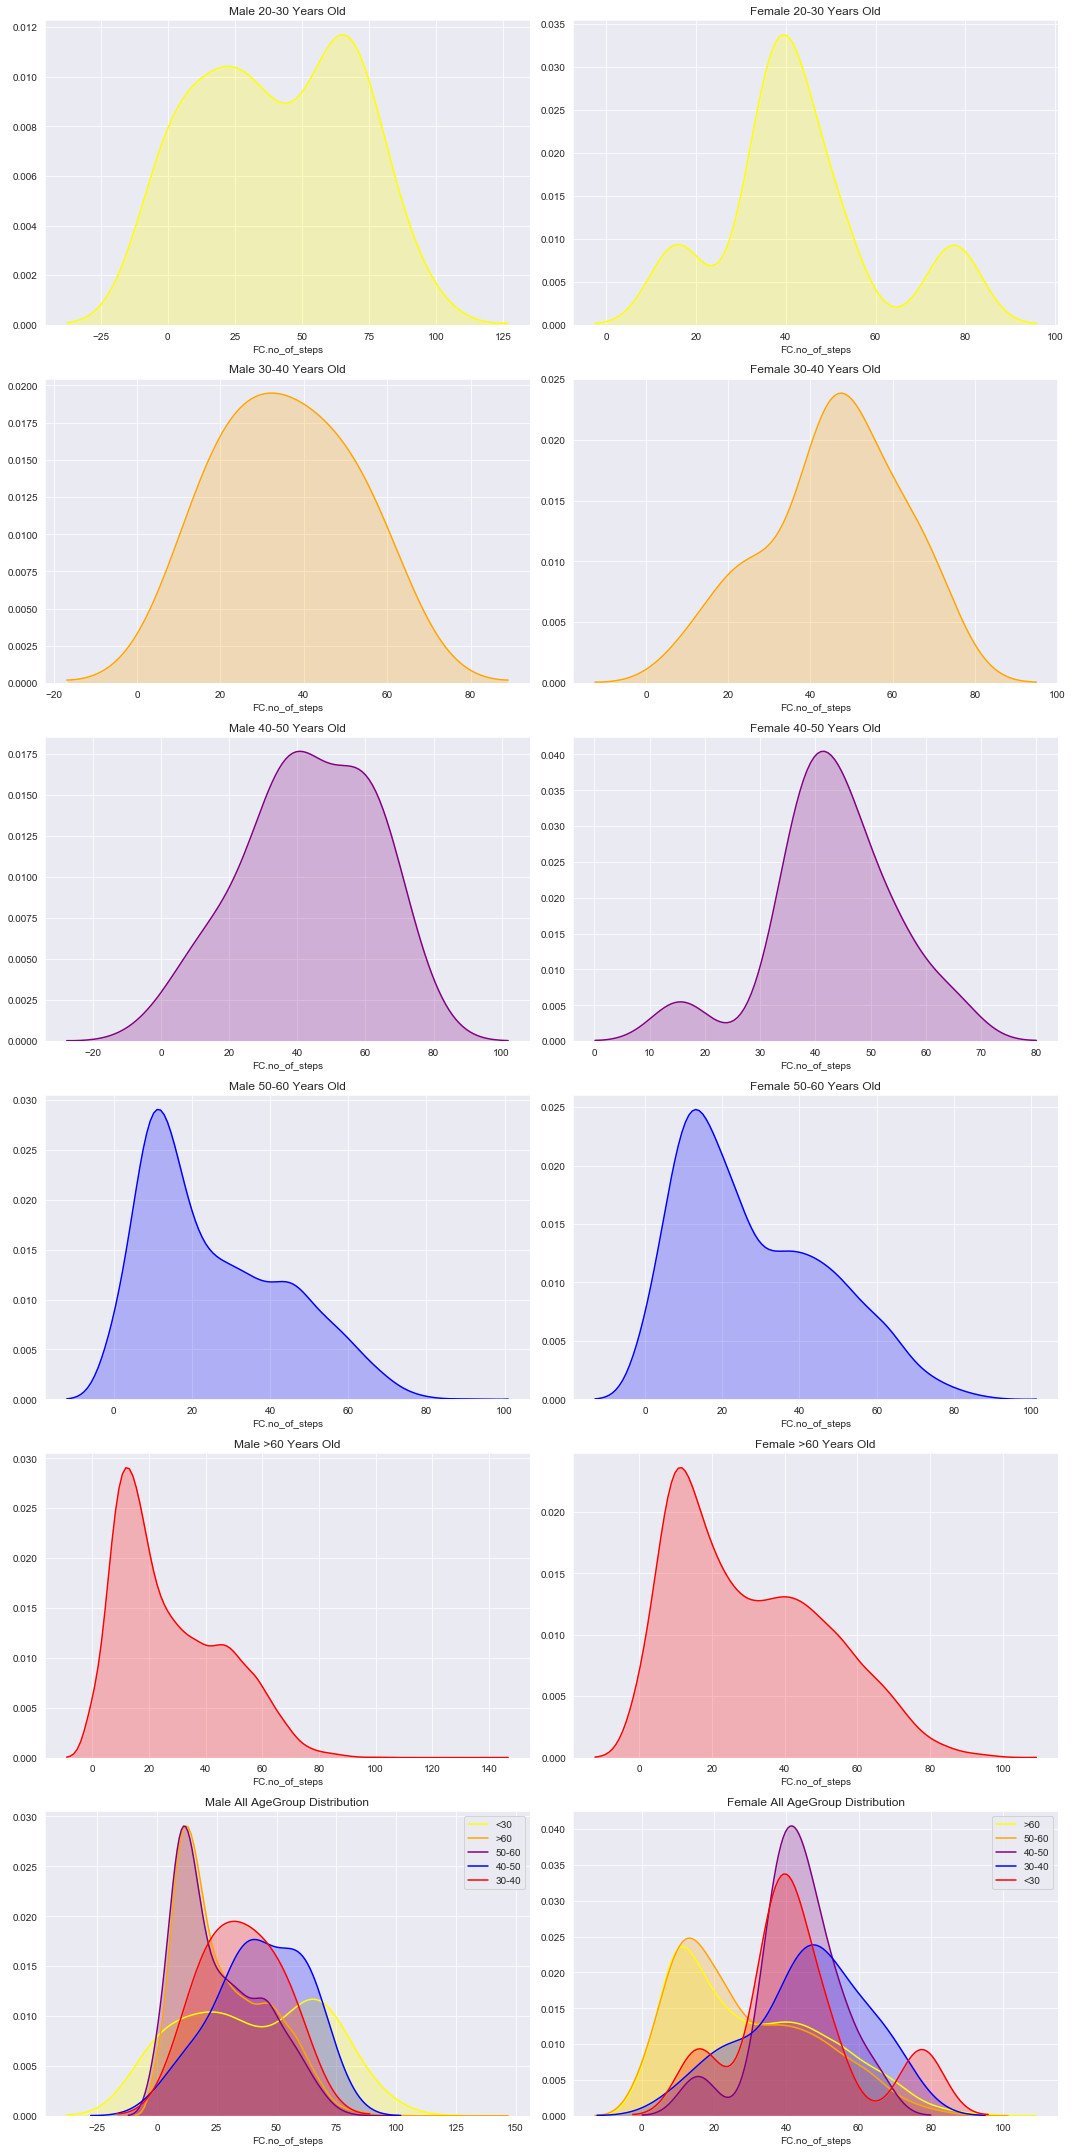

In [83]:
## Number of Steps
visualize_agegroups(data[(data["is_control"] == 1)], "FC.no_of_steps")

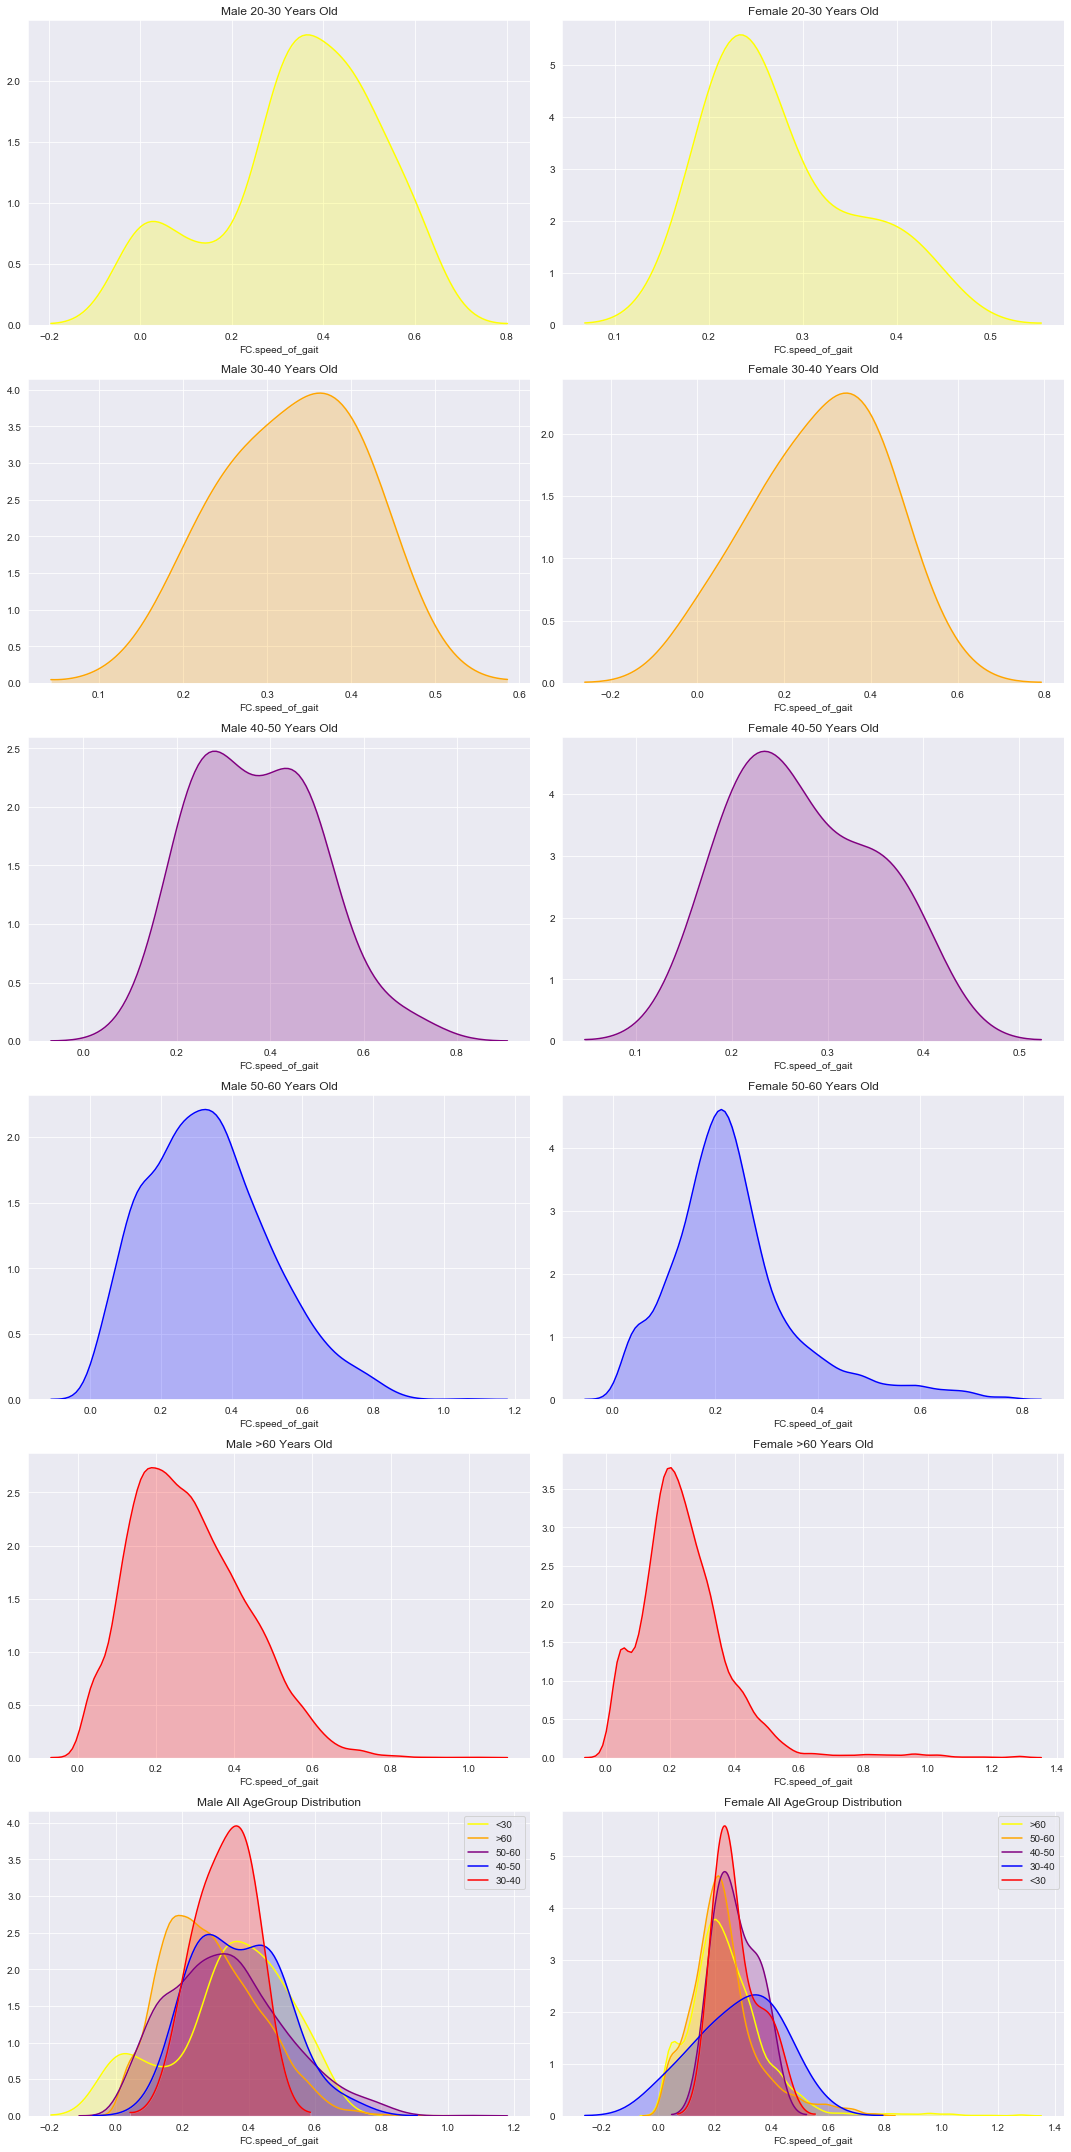

In [84]:
## Number of Steps
visualize_agegroups(data[(data["is_control"] == 1)], "FC.speed_of_gait")

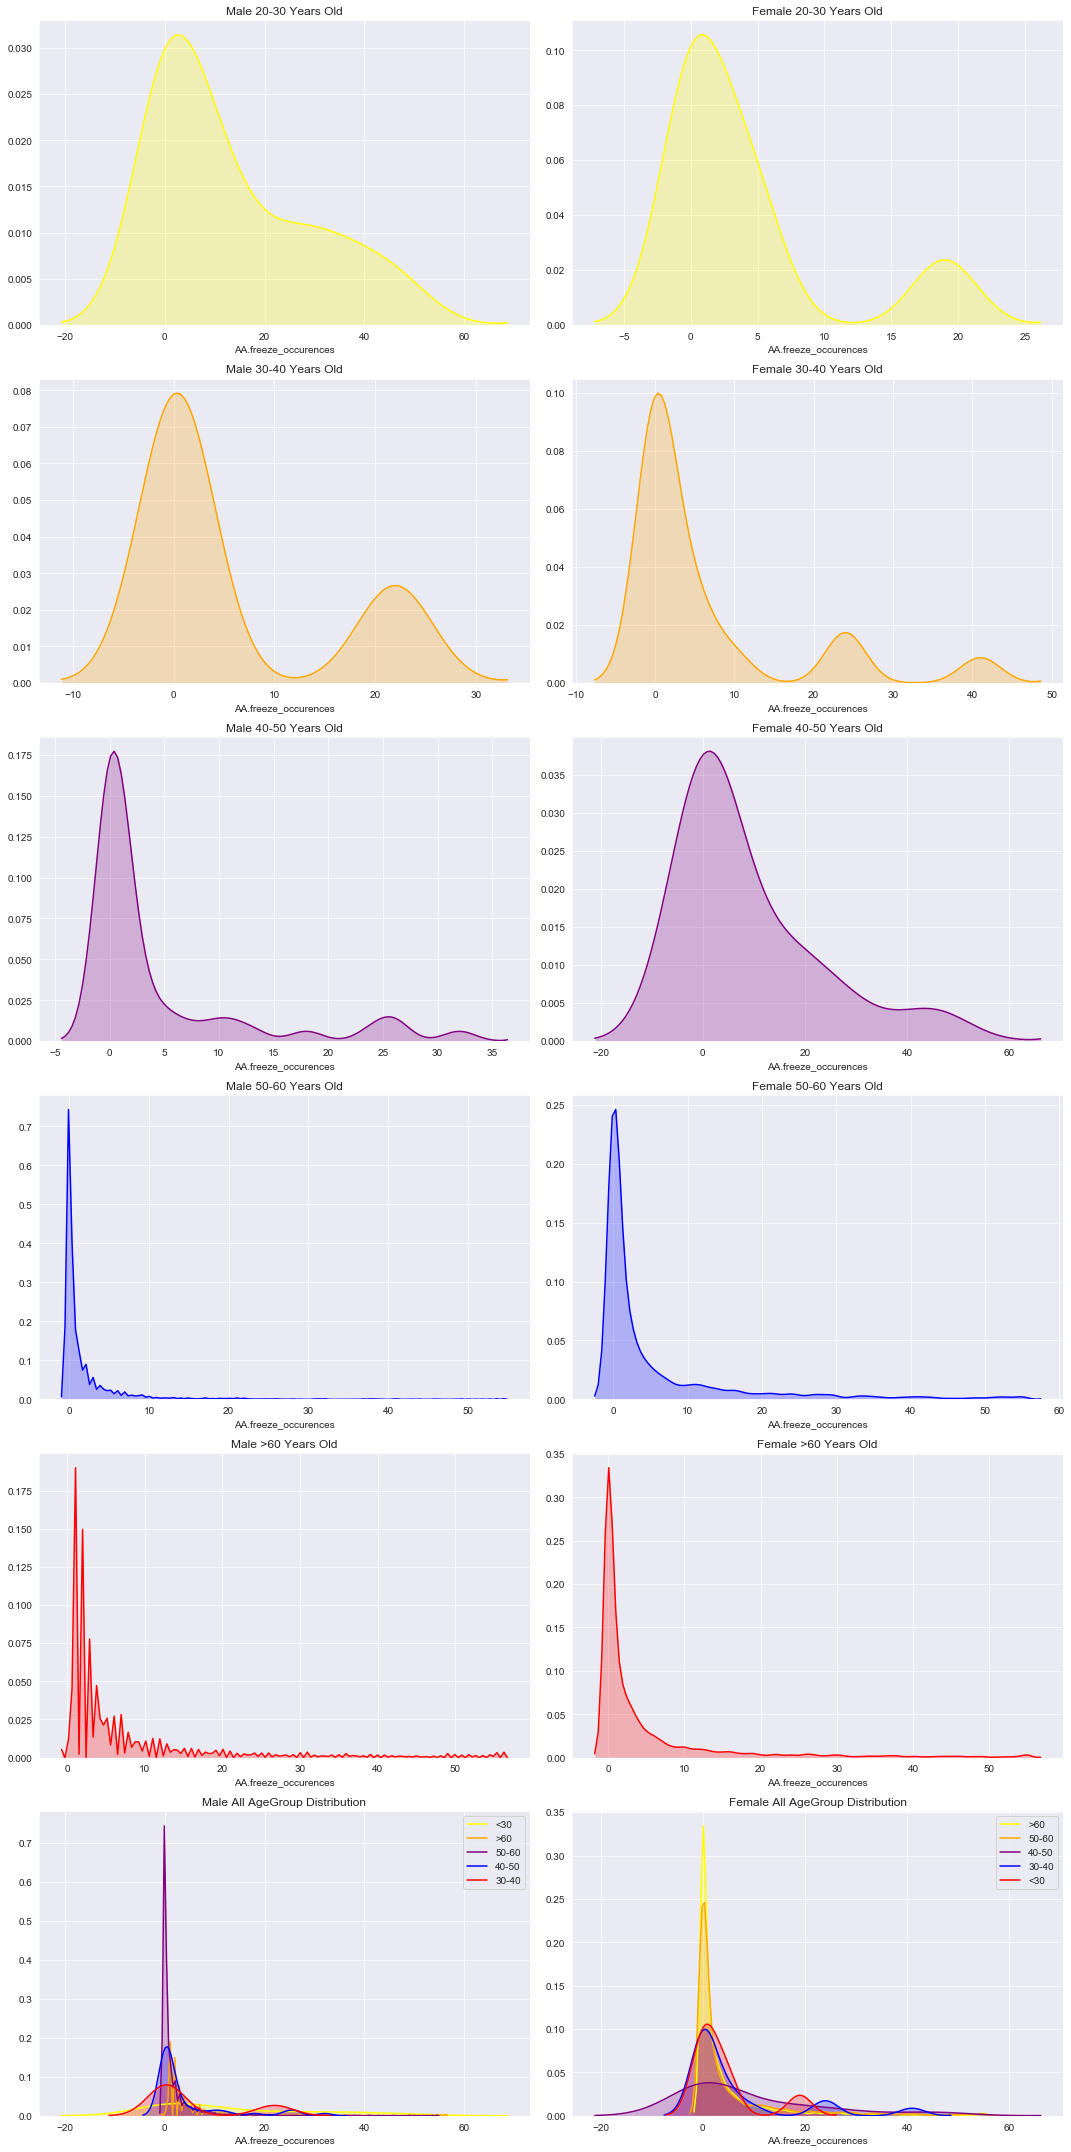

In [85]:
## Number of Steps
visualize_agegroups(data[(data["is_control"] == 1)], "AA.freeze_occurences")

# Distribution of Control vs MS vs PD